# KNN - Predict whether a person will have diabetes or not

# Import all dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Load diabetes.csv

In [2]:
df = pd.read_csv('diabetes.csv')
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

## Examine the dataset

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data processing

In [14]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']



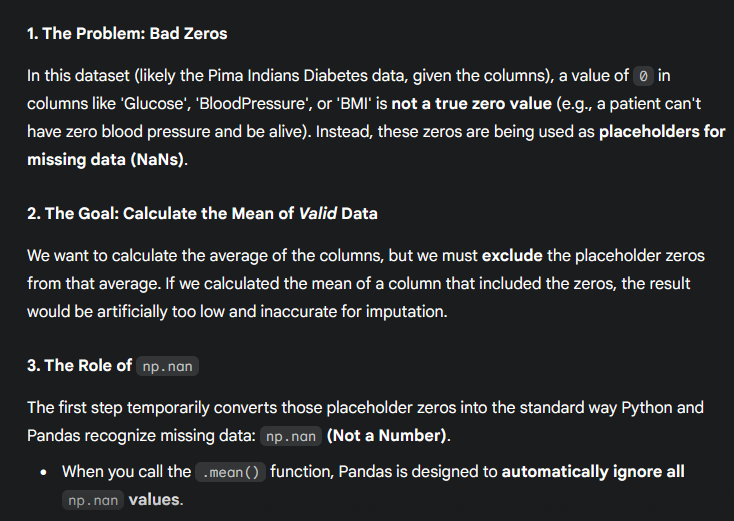

### 1. Compute the mean 
### 2. replace the above columns' value with the mean.

In [13]:
mean_values = df[zero_not_accepted].replace(0,np.nan).mean()

print(mean_values)

for col in zero_not_accepted:
    df[col]=df[col].replace(0,mean_values[col])

df.describe()

Glucose          121.686763
BloodPressure     72.405184
SkinThickness     29.153420
BMI               32.457464
Insulin          155.548223
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Split the dataset with Test and Train with test_size=0.2

In [17]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=5)

x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
x_train.head

(614, 8)


<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
60             2     84.0      72.405184       29.15342  155.548223   
618            9    112.0      82.000000       24.00000  155.548223   
346            1    139.0      46.000000       19.00000   83.000000   
294            0    161.0      50.000000       29.15342  155.548223   
231            6    134.0      80.000000       37.00000  370.000000   
..           ...      ...            ...            ...         ...   
71             5    139.0      64.000000       35.00000  140.000000   
106            1     96.0     122.000000       29.15342  155.548223   
270           10    101.0      86.000000       37.00000  155.548223   
435            0    141.0      72.405184       29.15342  155.548223   
102            0    125.0      96.000000       29.15342  155.548223   

           BMI  DiabetesPedigreeFunction  Age  
60   32.457464                     0.304   21  
618  28.200000       

### Train the model

In [18]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Predict the model with test data

In [19]:
y_pred = knn.predict(x_test)

data = {
    'y_test':y_test,
    'y_pred':y_pred
}

df_tp = pd.DataFrame(data)
df_tp

,y_test,y_pred
668,0,0
324,0,1
624,0,0
690,0,1
473,0,1
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


### Evaluate the model

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6493506493506493


In [23]:
k_array = np.arange(1,31,2)
k_array

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [24]:
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(x_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(x_test))
    print(k)
    print(ac)

1
0.6688311688311688
3
0.6753246753246753
5
0.6493506493506493
7
0.6558441558441559
9
0.6883116883116883
11
0.7012987012987013
13
0.7012987012987013
15
0.7142857142857143
17
0.7272727272727273
19
0.7337662337662337
21
0.7532467532467533
23
0.7337662337662337
25
0.7532467532467533
27
0.7207792207792207
29
0.7077922077922078


### k = 21 has the most accuracy

In [25]:
knn_21 = KNeighborsClassifier(n_neighbors=21)
knn_21.fit(x_train,y_train)
y_pred21 = knn_21.predict(x_test)
print(accuracy_score(y_test, y_pred21))

0.7532467532467533


### Validate with confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred21)
df_cm = pd.DataFrame(cm, columns=['Predicted Class 0', 'Predicted Class 1'], index=['Actual Class 0', 'Actual Class 1'])
df_cm

,Predicted Class 0,Predicted Class 1
Actual Class 0,80,19
Actual Class 1,19,36
